# Bank Marketing Campaign 

## Problem Statement
    Has the client subscribed a term deposit?

## Importing Necessary Libraries

In [1]:
import pandas as pd
import shap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sweetviz as sv
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,precision_score,recall_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import ADASYN,SMOTE
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [2]:
shap.initjs()

## Domain Expertise

#### Client Data:

##### 1.Age

* Represents the age of the customer.

##### 2.Job

* This is a categorical variable that represents the type of job held by the client.
* The jobs are categorized into 12 types: ‘admin.’, ‘blue-collar’, ‘entrepreneur’, ‘housemaid’, ‘management’, ‘retired’, ‘self- employed’, ‘services’, ‘student’, ‘technician’, ‘unemployed’, and ‘unknown’.


##### 3.Marital

* The "marital" property is one of the dataset's other significant features from Portuguese Bank Marketing. 
* The client's marital status is represented by this categorical variable. 
* There are four categories for marital status: "divorced," "married," "single," and "unknown."

##### 4.Education

* The Portuguese Bank Marketing dataset's "education" property is a categorical variable that indicates the client's degree of education.
* Eight categories are used to classify the education level: "basic.4y," "basic.6y," "basic.9y," "high school," "illiterate," "professional course," "university degree," and "unknown."

##### 5.Default

* One important element that helps determine whether a client has credit in default in the Portuguese Bank Marketing dataset is the 'default' attribute.
* There are three possible values for this binary variable: "no", "yes", and "unknown".
* Customers with delinquent credit may be viewed as more risky, which could affect the bank's marketing approach or their ability to obtain a term deposit.

##### 6.Housing

* One important characteristic that shows whether a client has a home loan is the "housing" trait. 
* There are three possible values for this binary variable:"no", "yes", and "unknown".

##### 7.Loan

* The ‘loan’ attribute is a key feature that indicates whether a client has a personal loan.
* This is a binary variable with three possible values: "no", "yes", and "unknown".

#### Campaign Data:

##### 8.Contact

* The ‘contact’ attribute indicates the communication type used to contact the client during the campaign.
* This is a categorical variable with two possible values: 'cellular’,‘telephone’.

##### 9.Month

* The ‘month’ attribute is a crucial feature that indicates the last contact month of the year during the campaign. 
* This is a categorical variable with twelve possible values, each representing a month of the year: ‘jan’, ‘feb’, ‘mar’, ‘apr’, ‘may’, ‘jun’, ‘jul’, ‘aug’, ‘sep’, ‘oct’, ‘nov’, and ‘dec’.

##### 10.Day of the week

* The term day_of_week refers to the last day of the week when contact was made. 
* It is a categorical variable, meaning it can take on one of a limited, and usually fixed, number of possible values.
* In this case, the possible values are ‘mon’, ‘tue’, ‘wed’, ‘thu’, and ‘fri’, representing Monday, Tuesday, Wednesday, Thursday, and Friday respectively.

##### 11.Duration

* The duration attribute refers to the length of the last contact, measured in seconds.
* It is a numeric variable.
* If the duration equals zero (i.e., the call was not answered or immediately hung up), then the output target y is ‘no’,  indicating that the outcome of the contact was not successful.

##### 12.Campaign

* The campaign attribute represents the total number of contacts made with a specific client during the current campaign. 
* This is a numeric variable, and it includes the most recent contact.

#### Previous Campaign Data: 

##### 13.Pdays

* The pdays attribute stands for “previous days”. 
* It is a numeric variable that represents the number of days that have passed since the client was last contacted from a previous campaign.
* if the client was not previously contacted, the pdays attribute is set to 999. This is a special value used to indicate that there is no past data available for the client in terms of contact from previous campaigns.


##### 14.Previous

* The previous attribute is a numeric variable that represents the total number of contacts made with a specific client before the current campaign started.
* Higher number might indicate a longer relationship or more attempts to engage with the client.

##### 15.POutcome

* The poutcome attribute represents the outcome of the previous marketing campaign for a specific client.
* It is a categorical variable, meaning it can take on one of a limited, and usually fixed, number of possible values.
* In this case, the possible values are ‘failure’, ‘nonexistent’, and ‘success’.

#### Social and Economic Context Attributes:

##### 16.Employment variation rate(emp.var.rate)

* It is a numeric variable that represents the quarterly indicator of employment variation.
* The employment variation rate measures the change in the number of employed people from one quarter to the next.
* This can be a positive or negative value, depending on whether employment has increased or decreased.

##### 17. Consumer price index(cons.price.idx)

* It is a monthly economic indicator. 
* It is a numeric variable.
* The consumer price index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care. 

##### 18.Consumer confidence index(cons.conf.idx)

* It is a monthly economic indicator. 
* It is a numeric variable.
* The consumer confidence index (CCI) is a measure of consumers’ optimism about the state of the economy.
* It is based on the results of household surveys of the relative financial health, spending power, and confidence of average consumers.

##### 19.Euribor 3 month rate (euribor3m)

* The euribor3m attribute stands for the “Euro Interbank Offered Rate for 3 months”.
* It is a numeric variable that represents the daily interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a duration of 3 months.

##### 20.Number of employees(nr.employed)

* It is a numeric variable that represents a quarterly indicator of the number of employees.
* The number of employees can be an important indicator of the state of the economy.
* A high number of employees can indicate a healthy economy with low unemployment, while a low number of employees can suggest an economy in recession with high unemployment.

##### 21.Output variable (desired target - y):

* The y attribute represents whether the client has subscribed to a term deposit.
* It is a binary variable, meaning it can take on one of two possible values: ‘yes’ or ‘no’.

## Basic Checks

### Loading of data

In [417]:
df = pd.read_csv('bank-additional-full.csv',delimiter=';')

In [428]:
df.euribor3m.value_counts().reset_index().euribor3m.values[:20]

array([4.857, 4.962, 4.963, 4.961, 4.856, 4.964, 1.405, 4.965, 4.864,
       4.96 , 4.968, 4.959, 4.86 , 4.855, 4.076, 1.266, 4.859, 4.12 ,
       4.858, 4.153])

In [5]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
df.shape

(41188, 21)

The dataset contain 41188 rows and 21 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## EDA

### Feature Analysis

### Univariate Analysis

In [492]:
my_report = sv.analyze(df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Bivariate Analysis

#### Duration

In [12]:
sns.set(rc={"figure.figsize": (18, 8)})

<Axes: xlabel='duration', ylabel='Count'>

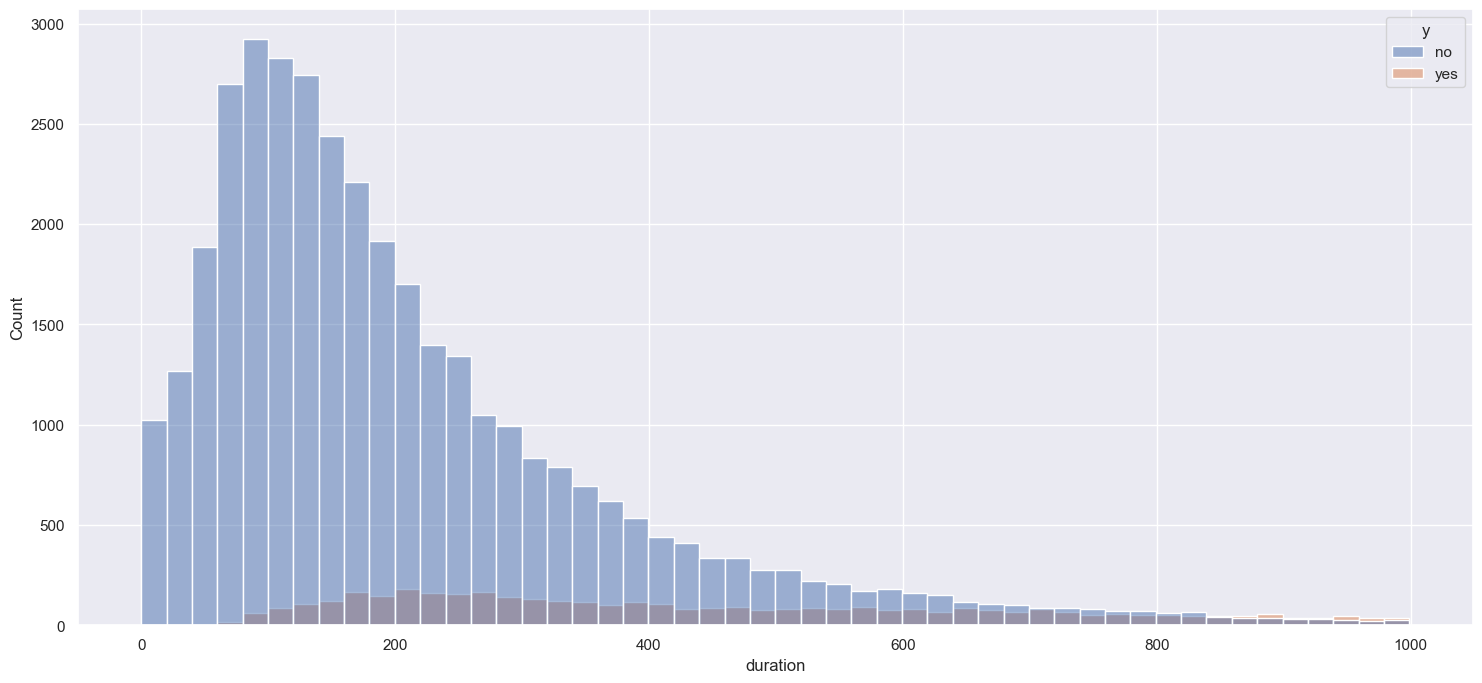

In [13]:
sns.histplot(x='duration',hue='y',data=df[df.duration<1000],bins=50)

<Axes: xlabel='duration', ylabel='Count'>

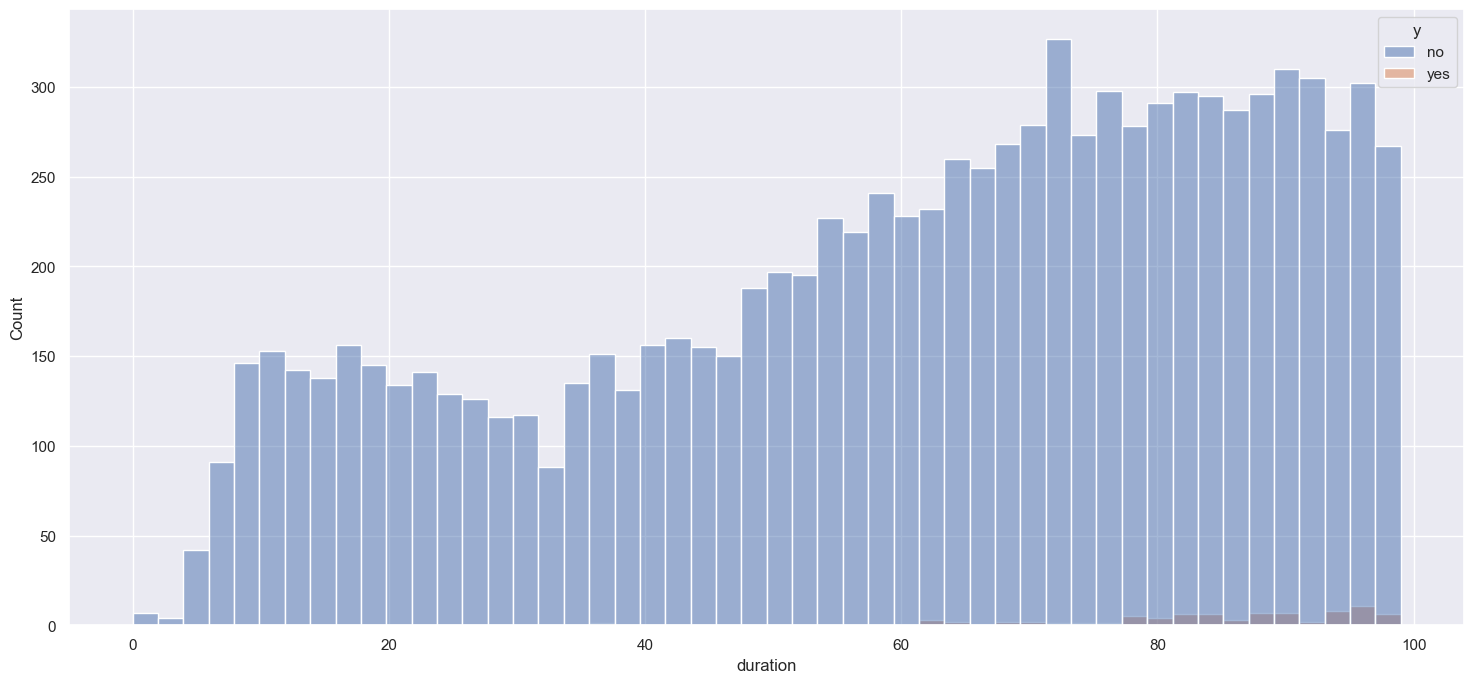

In [14]:
sns.histplot(x='duration',hue='y',data=df[df.duration<100],bins=50)

Due to the fact that almost all campaigns with call duration less than 60 seconds is getting no conversion, we can assume that, to accurately model the people who are willing to take a Term Deposit, we will have to consider data points with call duration greater than 60s

Also since it is impossible to say the call duration of the call for campaign before making the call, using that as a feature for identifying high potential customer to make the calls is not apt. Hence while creating the model we will drop that feature

In [15]:
df=df[df.duration>60]

In [16]:
df.drop('duration',inplace=True,axis=1)

#### Age

In [17]:
sns.set(rc={"figure.figsize": (18, 8)})

<Axes: xlabel='age', ylabel='Count'>

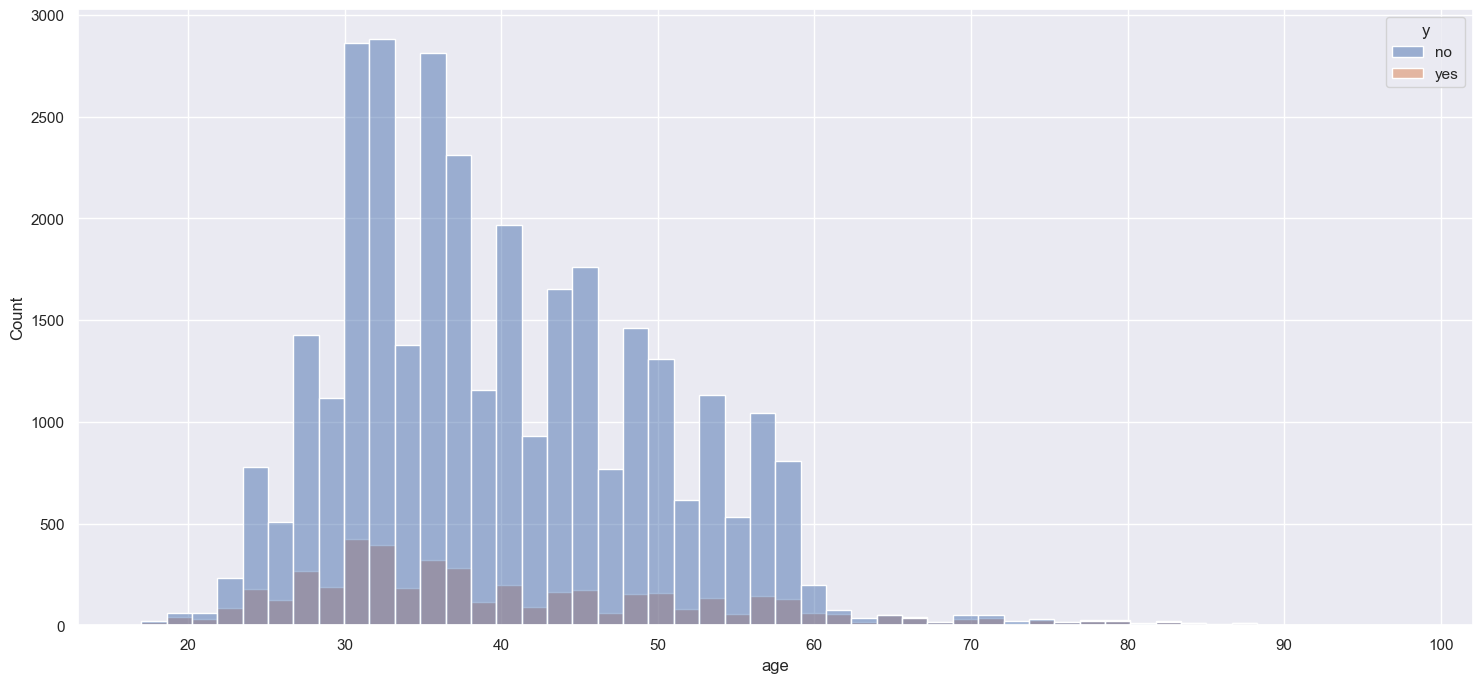

In [18]:
sns.histplot(x='age',hue='y',data=df,bins=50)

People with age between 25 to 45 is likely to take a term deposit.

#### Job

In [19]:
df.job.value_counts()

job
admin.           9293
blue-collar      8260
technician       6028
services         3555
management       2635
retired          1602
entrepreneur     1300
self-employed    1266
housemaid         969
unemployed        889
student           814
unknown           291
Name: count, dtype: int64

In [20]:
sns.set(rc={"figure.figsize": (18, 8)})

<Axes: xlabel='job', ylabel='Count'>

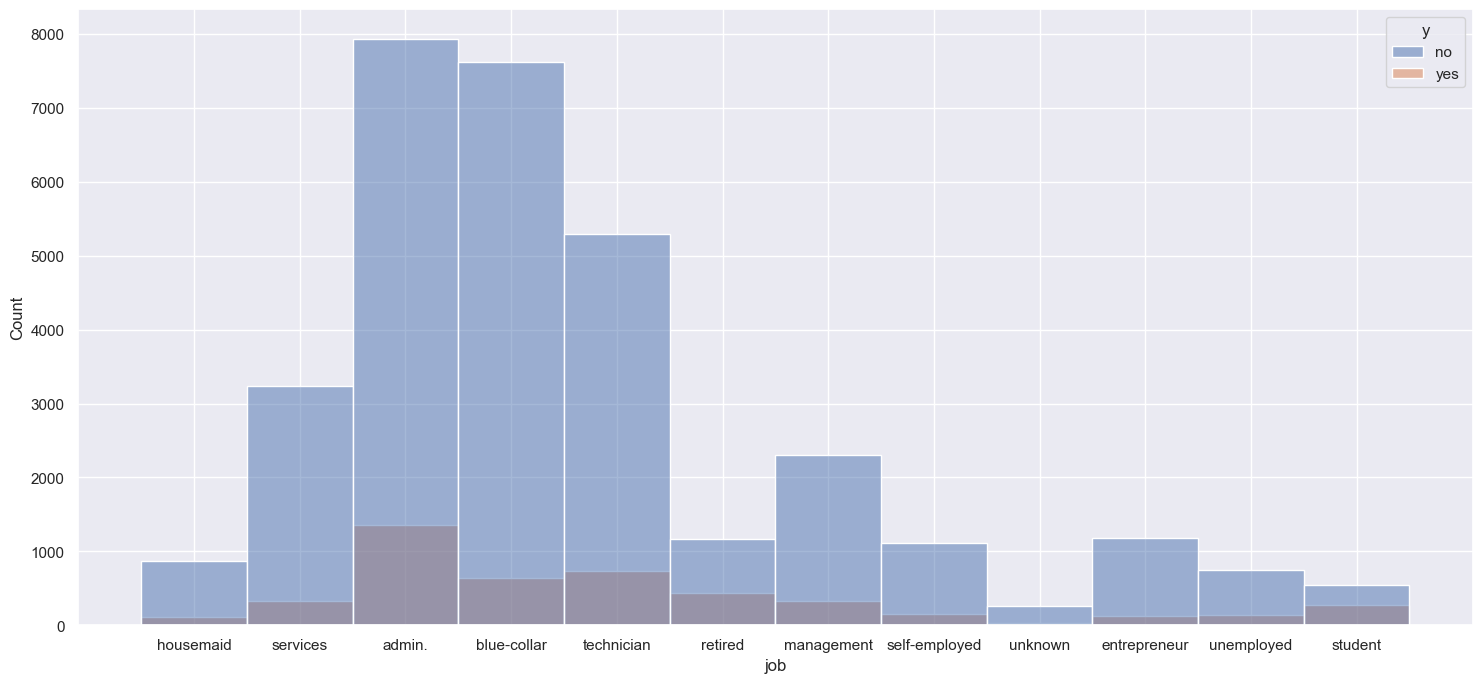

In [21]:
sns.histplot(x='job',hue='y',data=df)

Based on the histplot it is seen that admin,technician and blue-collar has more chances to take term deposit.So ranking is given according to the plot for converting it into numerical column.

In [22]:
job_dict = {'unknown':0,'housemaid':1,'entrepreneur':2,'unemployed':3,'self-employed':4,'student':5,'services':6,'management':7,'retired':8,'blue-collar':9,'technician':10,'admin.':11}

In [23]:
df['job'] = df.job.map(job_dict)

#### Marital

In [24]:
sns.set(rc={"figure.figsize": (5,4)})

<Axes: xlabel='marital', ylabel='Count'>

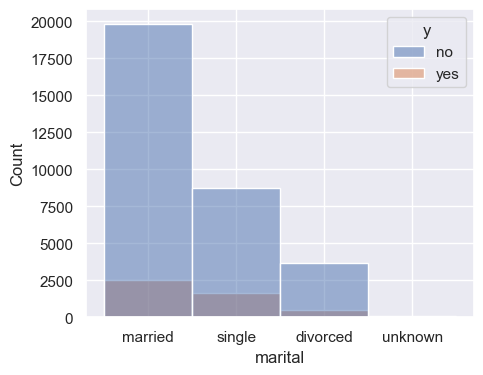

In [25]:
sns.histplot(x='marital',hue='y',data=df)

It looks like people who are married are more likely to take Term Deposits. Unkown is replaced as none for effective missing value treatment.

In [26]:
df[df.marital=='unknown'].marital = None

#### Education

In [27]:
sns.set(rc={"figure.figsize": (15,4)})

<Axes: xlabel='education', ylabel='Count'>

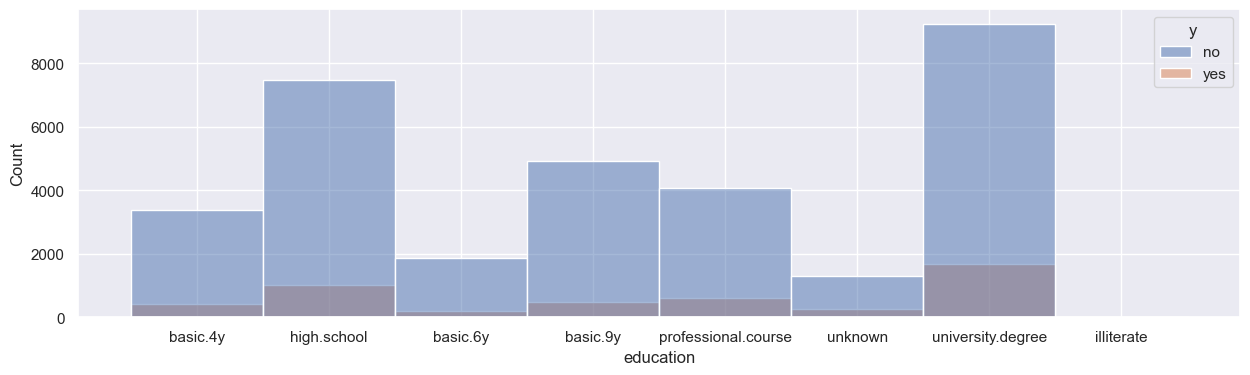

In [28]:
sns.histplot(x='education',hue='y',data=df)

People who have a university degree are more likely to take term deposit according to our plot. Unknown category is replaced as none for effective missing value treatment.

In [29]:
df[df.education=='unknown'].education = None

#### Default

In [30]:
sns.set(rc={"figure.figsize": (5,4)})

<Axes: xlabel='default', ylabel='Count'>

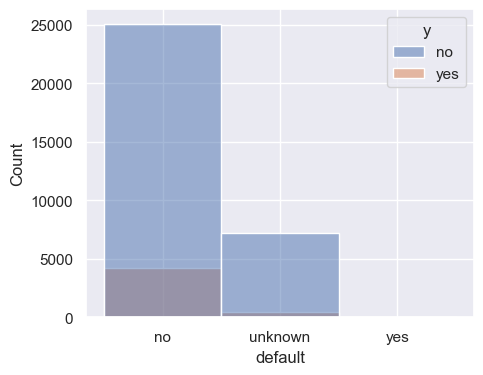

In [31]:
sns.histplot(x='default',hue='y',data=df)

People who dont have credit default are the ones who are marked for the produt mostly. Here unkown is replaced as none

In [32]:
df[df.default=='unknown'].default = None

#### Housing

<Axes: xlabel='housing', ylabel='Count'>

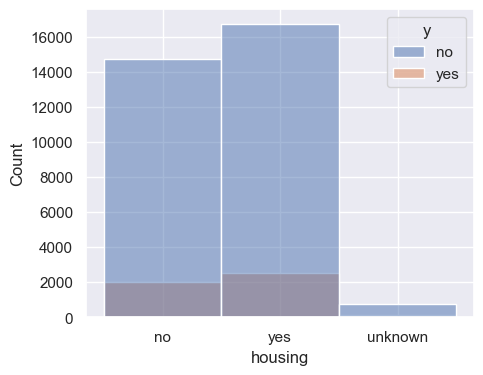

In [33]:
sns.histplot(x='housing',hue='y',data=df)

People with housing have more chances to take term deposit than people without housing.Unknown is replaced as none.

In [34]:
df[df.housing=='unknown'].housing = None

#### Loan

<Axes: xlabel='loan', ylabel='Count'>

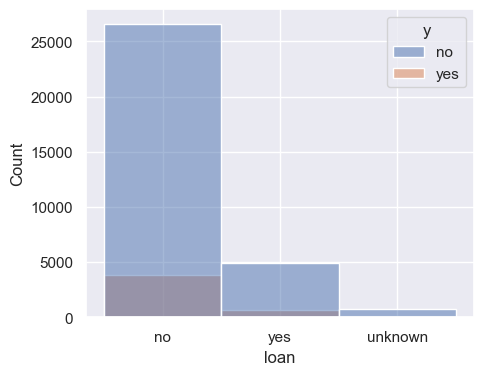

In [35]:
sns.histplot(x='loan',hue='y',data=df)

People with no loan will take term deposit .Unkown is replaced as none.

In [36]:
df[df.loan=='unknown'].loan = None

#### Contact

<Axes: xlabel='contact', ylabel='Count'>

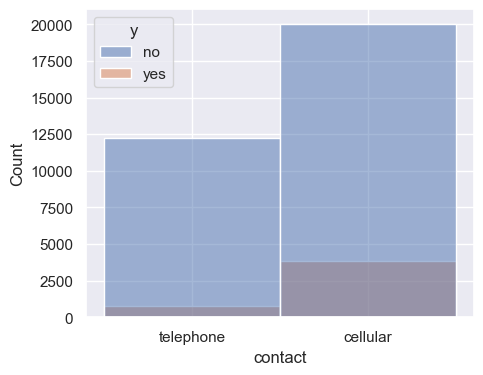

In [37]:
sns.histplot(x='contact',hue='y',data=df)

People who attended the call in cellular mode is likely to take term deposit compared to telephone.

#### Month

<Axes: xlabel='month', ylabel='Count'>

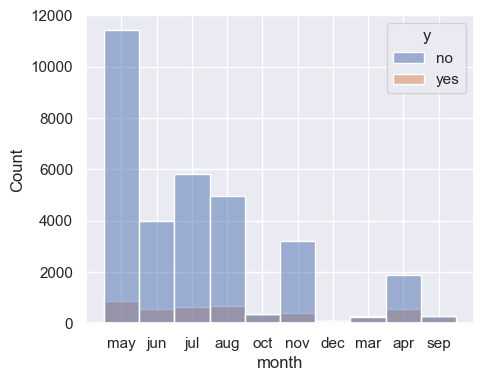

In [38]:
sns.histplot(x='month',hue='y',data=df)

People take term deposit mostly in the month of may, july, august, june and april.

#### Day of Week

<Axes: xlabel='day_of_week', ylabel='Count'>

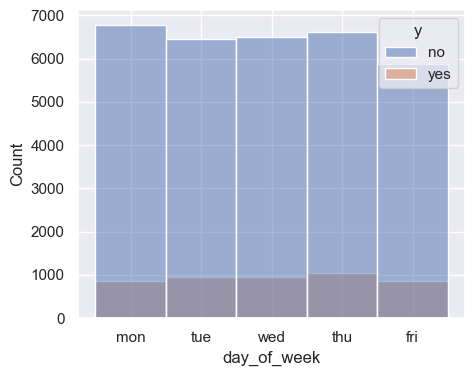

In [39]:
sns.histplot(x='day_of_week',hue='y',data=df)

Day_of_week doesn't affect the people from taking term deposit.So it can be dropped and it is not needed for model fitting.

In [40]:
df.drop('day_of_week',inplace=True,axis=1)

#### Campaign

<Axes: xlabel='campaign', ylabel='Count'>

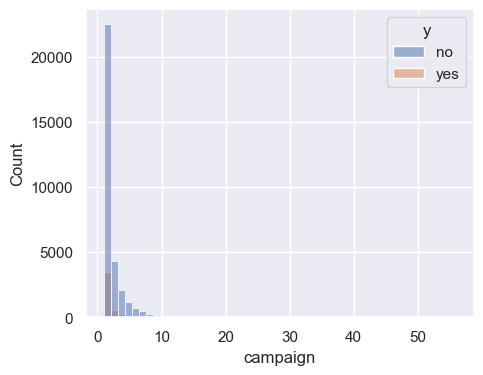

In [41]:
sns.histplot(x='campaign',hue='y',data=df,bins=50)

Number of campaigns during the current campaign period cannot be taken as an effective measure for creating a good model to identify high propensity customers as that value cannot be calculated before a campaign begins.

In [42]:
df.drop('campaign',inplace=True,axis=1)

#### P-Days

<Axes: xlabel='pdays', ylabel='Count'>

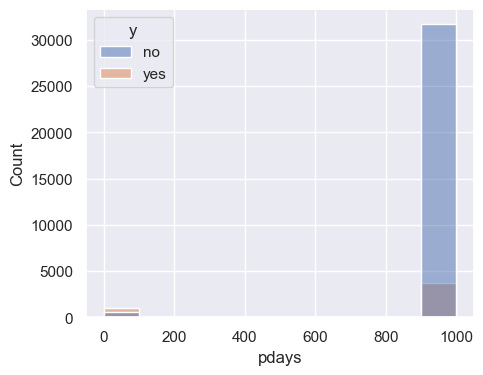

In [43]:
sns.histplot(x='pdays',hue='y',data=df,bins=10)

Here we convert the data in a categorical feature, which conveys whether the customer was contacted or not before.


In [44]:
def pdays_conv(x):
    if x==999:
        return('not_contacted')
    else:
        return('contacted')

In [45]:
df.pdays.apply(pdays_conv)

0        not_contacted
1        not_contacted
2        not_contacted
3        not_contacted
4        not_contacted
             ...      
41183    not_contacted
41184    not_contacted
41185    not_contacted
41186    not_contacted
41187    not_contacted
Name: pdays, Length: 36902, dtype: object

In [46]:
df['contacted'] = df.pdays.apply(pdays_conv)

<Axes: xlabel='contacted', ylabel='Count'>

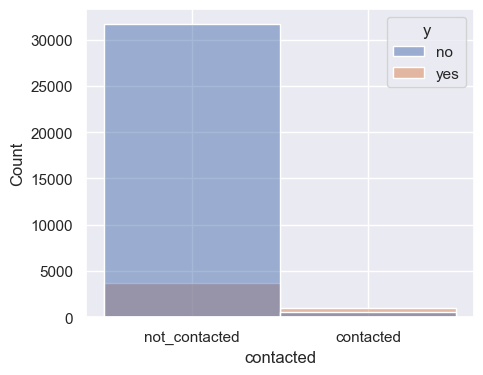

In [47]:
sns.histplot(x='contacted',hue='y',data=df)

In [48]:
df.drop('pdays',inplace=True,axis=1)

#### Previous

<Axes: xlabel='previous', ylabel='Count'>

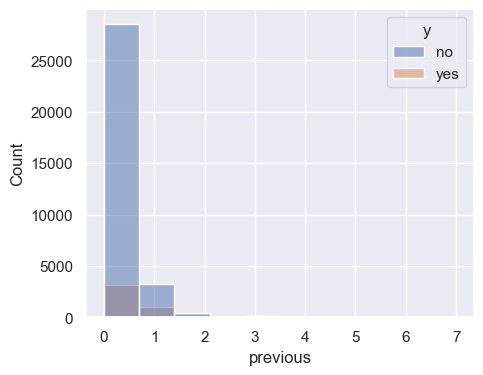

In [49]:
sns.histplot(x='previous',hue='y',data=df,bins=10)

From this we can understand that the preference of customers is almost fixed from the first contact itself, the person who has not taken the Term deposit in the first contact mostly likely wont take it during the subsequent contacts.

#### P-Outcome

<Axes: xlabel='poutcome', ylabel='Count'>

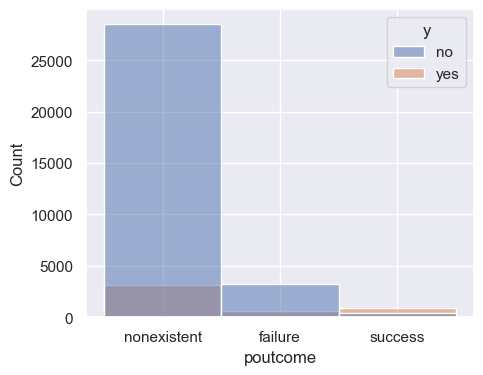

In [50]:
sns.histplot(x='poutcome',hue='y',data=df)

Client who hasn't experienced previous marketing campaign is likely to take term deposit.

#### Employment Variation Rate

<Axes: xlabel='emp.var.rate', ylabel='Count'>

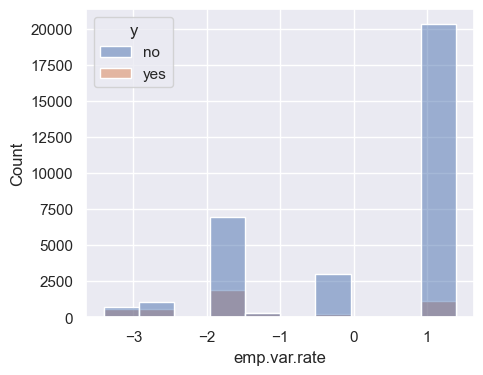

In [51]:
sns.histplot(x='emp.var.rate',hue='y',data=df,bins=10)

### Consumer Price Index 

<Axes: xlabel='cons.price.idx', ylabel='Count'>

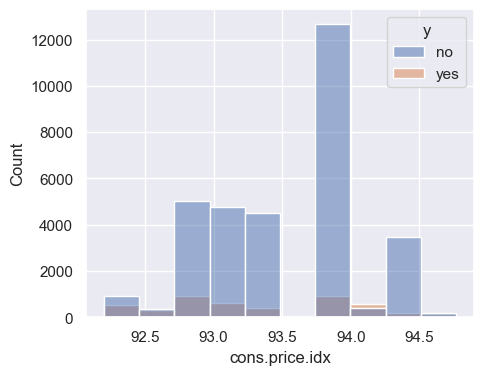

In [52]:
sns.histplot(x='cons.price.idx',hue='y',data=df,bins=10)

### Consumer Confidence Index 

<Axes: xlabel='cons.conf.idx', ylabel='Count'>

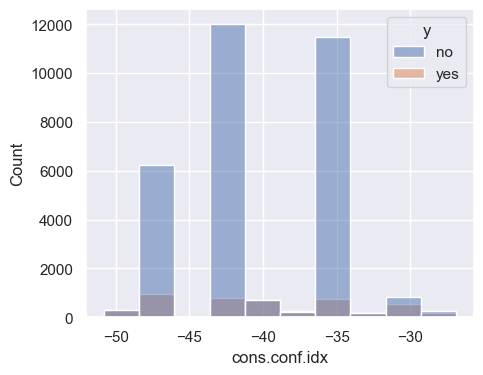

In [53]:
sns.histplot(x='cons.conf.idx',hue='y',data=df,bins=10)

### Euribor 3 month rate 

<Axes: xlabel='euribor3m', ylabel='Count'>

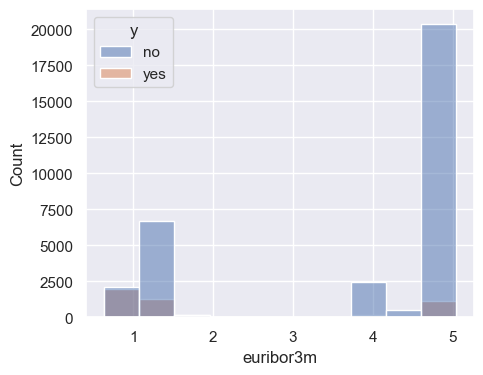

In [54]:
sns.histplot(x='euribor3m',hue='y',data=df,bins=10)

### Number of employees 

<Axes: xlabel='nr.employed', ylabel='Count'>

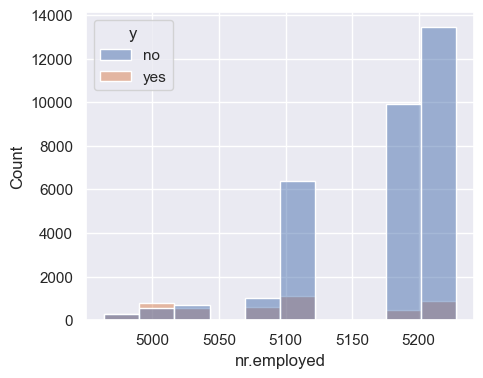

In [55]:
sns.histplot(x='nr.employed',hue='y',data=df,bins=10)

This feature is related to the bank's operations and may not directly impact a customer's decision to subscribe to a term deposit.


In [56]:
df.drop('nr.employed',inplace=True,axis=1)

## Data Preprocessing

In [57]:
df['y'] = (df['y']=='yes').astype('int')

In [58]:
X,y = df[df.columns.difference(['y'])],df.y

In [59]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 36902, dtype: int32

In [60]:
cat_col = X.columns[(X.dtypes=='object').values]
num_col = X.columns[~(X.dtypes=='object').values]

In [61]:
X[num_col].var()

age               110.918217
cons.conf.idx      22.004513
cons.price.idx      0.335529
emp.var.rate        2.515340
euribor3m           3.037825
job                 7.942463
previous            0.259323
dtype: float64

In [62]:
num_col = num_col.difference(['previous'])

# Feature Preprocessing

## Train Test Split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify=y)

### One Hot Encoding

In [64]:
ohe = OneHotEncoder(drop='if_binary',handle_unknown='ignore',sparse_output=False)

In [65]:
ohe.fit(X_train[cat_col])

OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)

In [66]:
X_train_ohe = pd.DataFrame(data=ohe.transform(X_train[cat_col]),columns=ohe.get_feature_names_out())

In [67]:
X_test_ohe = pd.DataFrame(data=ohe.transform(X_test[cat_col]),columns=ohe.get_feature_names_out())

In [68]:
X_train_pr = pd.concat([X_train[num_col].reset_index(drop=True),X_train_ohe],axis=1)

In [69]:
X_test_pr = pd.concat([X_test[num_col].reset_index(drop=True),X_test_ohe],axis=1)

# Modeling

## 1. RandomForest Classifier

In [324]:
rfc = RandomForestClassifier(n_estimators=600,max_depth=11,n_jobs=-1,class_weight='balanced',min_impurity_decrease=1e-9,random_state=5)

In [325]:
rfc.fit(X_train_pr,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11,
                       min_impurity_decrease=1e-09, n_estimators=600, n_jobs=-1,
                       random_state=5)

In [388]:
y_pred_train = rfc.predict(X_train_pr)

In [389]:
y_pred_test = rfc.predict(X_test_pr)

In [390]:
y_pred_test.shape

(7381,)

## Feature Importance

In [358]:
feat_imp = pd.DataFrame(data=rfc.feature_importances_,index=rfc.feature_names_in_,columns=['importance'])

In [359]:
feat_imp.sort_values('importance',ascending=False)

,importance
euribor3m,0.243171
emp.var.rate,0.162537
cons.conf.idx,0.075606
cons.price.idx,0.065359
contacted_not_contacted,0.063998
age,0.060795
poutcome_success,0.043219
month_may,0.033137
job,0.029335
contact_telephone,0.026188


In [360]:
explainer = shap.Explainer(rfc)

In [361]:
shap_values = explainer.shap_values(X_test_pr.sample(1000))

In [364]:
shap_values.shape

(1000, 42, 2)

In [365]:
rfc_result = pd.DataFrame(shap_values[:,:,1],columns=X_test_pr.columns)
vals = np.abs(rfc_result.values).mean(0)
shap_importance = pd.DataFrame(list(zip(X_test_pr.columns,vals)),columns = ['col_name','feature_importance'])
shap_importance.sort_values(by=['feature_importance'],ascending=False,inplace=True)
shap_importance.reset_index(inplace=True,drop=True)

In [366]:
shap_importance

,col_name,feature_importance
0,euribor3m,7.589118e-02
1,emp.var.rate,6.840252e-02
2,month_may,2.657023e-02
3,contact_telephone,2.203516e-02
4,contacted_not_contacted,1.342028e-02
5,cons.conf.idx,1.335853e-02
6,age,1.108630e-02
7,cons.price.idx,1.065186e-02
8,poutcome_success,1.047735e-02
9,default_unknown,9.939258e-03


# Evaluation

### Train

In [391]:
accuracy_score(y_train,y_pred_train)

0.853968361505369

In [392]:
f1_score(y_train,y_pred_train)

0.5316675719717545

In [393]:
roc_auc_score(y_train,y_pred_train)

0.7706679911477141

In [394]:
precision_score(y_train,y_pred_train)

0.4453949763378231

In [395]:
recall_score(y_train,y_pred_train)

0.6593909997305308

### Test

In [396]:
accuracy_score(y_test,y_pred_test)


0.8349817097954206

In [397]:
f1_score(y_test,y_pred_test)

0.4817021276595745

In [398]:
roc_auc_score(y_test,y_pred_test)

0.7386311565858169

In [399]:
precision_score(y_test,y_pred_test)

0.3980309423347398

In [400]:
recall_score(y_test,y_pred_test)

0.6099137931034483

In [401]:
rfc.predict_proba(X_test_pr)[:,1]

array([0.26489112, 0.2398001 , 0.31326032, ..., 0.19302429, 0.15267383,
       0.35753367])

In [402]:
df_train = pd.DataFrame({'obs':y_train.values.ravel(),'pred':rfc.predict_proba(X_train_pr[rfc.feature_names_in_])[:,1]},index=X_train_pr.index)
df_train['bin'] = pd.cut(df_train.pred.rank(method='first'),10,labels=range(10,0,-1),duplicates='drop')
dec_bins = df_train.groupby('bin')['obs'].agg(['count','sum']).sort_index(ascending=False)


In [403]:
dec_bins.rename(columns={'count':'nobs','sum':'trgt_count'},inplace=True)
dec_bins['obs_%']=(dec_bins['nobs']/(dec_bins['nobs'].sum()+1))*100
dec_bins['randomline']=dec_bins['obs_%'].cumsum()
dec_bins['trgt_rate%']=(dec_bins['trgt_count']/(dec_bins['nobs']+1))*100
dec_bins['cum_trgt']=dec_bins['trgt_count'].cumsum()
dec_bins['non_trgt']=dec_bins['nobs']-dec_bins['trgt_count']
dec_bins['cum_non_trgt']=dec_bins['non_trgt'].cumsum()
dec_bins['cum_non_trgt%']=(dec_bins['cum_non_trgt']/(dec_bins['non_trgt'].sum()+1))*100
dec_bins['gain']=(dec_bins['cum_trgt']/dec_bins['trgt_count'].sum())*100
dec_bins['cum_lift']=dec_bins['gain']/dec_bins['randomline']
dec_bins                                        

,nobs,trgt_count,obs_%,randomline,trgt_rate%,cum_trgt,non_trgt,cum_non_trgt,cum_non_trgt%,gain,cum_lift
bin,,,,,,,,,,,
1,2952,1973,9.999323,9.999323,66.813410,1973,979,979,3.792956,53.166262,5.316986
2,2952,544,9.999323,19.998645,18.421944,2517,2408,3387,13.122312,67.825384,3.391499
3,2952,397,9.999323,29.997968,13.443955,2914,2555,5942,23.021193,78.523309,2.617621
4,2952,343,9.999323,39.997290,11.615306,3257,2609,8551,33.129286,87.766101,2.194301
5,2952,181,9.999323,49.996613,6.129360,3438,2771,11322,43.865019,92.643492,1.852995
6,2952,103,9.999323,59.995935,3.487978,3541,2849,14171,54.902948,95.419025,1.590425
7,2952,86,9.999323,69.995258,2.912293,3627,2866,17037,66.006741,97.736459,1.396330
8,2952,46,9.999323,79.994580,1.557738,3673,2906,19943,77.265507,98.976017,1.237284
9,2952,30,9.999323,89.993903,1.015916,3703,2922,22865,88.586262,99.784425,1.108791


In [404]:
df_test = pd.DataFrame({'obs':y_test.values.ravel(),'pred':rfc.predict_proba(X_test_pr[rfc.feature_names_in_])[:,1]},index=X_test_pr.index)
df_test['bin'] = pd.cut(df_test.pred.rank(method='first'),10,labels=range(10,0,-1),duplicates='drop')
dec_bins_test = df_test.groupby('bin')['obs'].agg(['count','sum']).sort_index(ascending=False)


In [405]:
dec_bins_test.rename(columns={'count':'nobs','sum':'trgt_count'},inplace=True)
dec_bins_test['obs_%']=(dec_bins_test['nobs']/(dec_bins_test['nobs'].sum()+1))*100
dec_bins_test['randomline']=dec_bins_test['obs_%'].cumsum()
dec_bins_test['trgt_rate%']=(dec_bins_test['trgt_count']/(dec_bins_test['nobs']+1))*100
dec_bins_test['cum_trgt']=dec_bins_test['trgt_count'].cumsum()
dec_bins_test['non_trgt']=dec_bins_test['nobs']-dec_bins_test['trgt_count']
dec_bins_test['cum_non_trgt']=dec_bins_test['non_trgt'].cumsum()
dec_bins_test['cum_non_trgt%']=(dec_bins_test['cum_non_trgt']/(dec_bins_test['non_trgt'].sum()+1))*100
dec_bins_test['gain']=(dec_bins_test['cum_trgt']/dec_bins_test['trgt_count'].sum())*100
dec_bins_test['cum_lift']=dec_bins_test['gain']/dec_bins_test['randomline']
dec_bins_test 

,nobs,trgt_count,obs_%,randomline,trgt_rate%,cum_trgt,non_trgt,cum_non_trgt,cum_non_trgt%,gain,cum_lift
bin,,,,,,,,,,,
1,738,385,9.997291,9.997291,52.097429,385,353,353,5.469476,41.487069,4.149831
2,738,187,9.997291,19.994581,25.304465,572,551,904,14.006817,61.637931,3.082732
3,738,82,9.997291,29.991872,11.096076,654,656,1560,24.171057,70.474138,2.349775
4,738,62,9.997291,39.989163,8.389716,716,676,2236,34.645181,77.155172,1.929402
5,738,51,9.997291,49.986454,6.901218,767,687,2923,45.289743,82.650862,1.653465
6,738,38,9.997291,59.983744,5.142084,805,700,3623,56.135730,86.745690,1.446153
7,738,43,9.997291,69.981035,5.818674,848,695,4318,66.904245,91.379310,1.305772
8,738,38,9.997291,79.978326,5.142084,886,700,5018,77.750232,95.474138,1.193750
9,738,23,9.997291,89.975616,3.112314,909,715,5733,88.828633,97.952586,1.088657


    f1_score for Train data is 0.53
    f1_score for Test data is 0.48

## 2.Decision Tree

In [176]:
dtree = DecisionTreeClassifier()


In [178]:
dtree.fit(X_train_pr,y_train)

DecisionTreeClassifier()

In [180]:
y_pred_train = dtree.predict(X_train_pr)

In [181]:
y_pred_test = dtree.predict(X_test_pr)

In [183]:
y_test

10520    0
7223     0
10275    0
9471     0
37606    0
        ..
8233     1
5391     0
26766    0
24173    0
26914    0
Name: y, Length: 7381, dtype: int32

## Feature Importance

In [186]:
feat_imp = pd.DataFrame(data=dtree.feature_importances_,index=dtree.feature_names_in_,columns=['importance'])

In [187]:
feat_imp.sort_values('importance',ascending=False)

,importance
euribor3m,0.322045
age,0.190488
job,0.079987
housing_yes,0.030838
housing_no,0.028378
contacted_not_contacted,0.027006
loan_no,0.020846
education_high.school,0.019857
marital_married,0.019645
education_university.degree,0.019546


# Evaluation

### Train

In [188]:
accuracy_score(y_train,y_pred_train)

0.9867213170285559

In [192]:
f1_score(y_train,y_pred_train)

0.9444916454262249

In [193]:
roc_auc_score(y_train,y_pred_train)

0.949029843211972

In [194]:
precision_score(y_train,y_pred_train)

0.9952253058788422

In [195]:
recall_score(y_train,y_pred_train)

0.8986796011856643

### Test

In [196]:
accuracy_score(y_test,y_pred_test)

0.8290204579325294

In [197]:
f1_score(y_test,y_pred_test)

0.3357894736842105

In [198]:
roc_auc_score(y_test,y_pred_test)

0.6212783782736712

In [199]:
precision_score(y_test,y_pred_test)

0.3281893004115226

In [200]:
recall_score(y_test,y_pred_test)

0.34375

In [201]:
dtree.predict_proba(X_test_pr)[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [202]:
df_train = pd.DataFrame({'obs':y_train.values.ravel(),'pred':dtree.predict_proba(X_train_pr[dtree.feature_names_in_])[:,1]},index=X_train_pr.index)
df_train['bin'] = pd.cut(df_train.pred.rank(method='first'),10,labels=range(10,0,-1),duplicates='drop')
dec_bins = df_train.groupby('bin')['obs'].agg(['count','sum']).sort_index(ascending=False)


In [203]:
dec_bins.rename(columns={'count':'nobs','sum':'trgt_count'},inplace=True)
dec_bins['obs_%']=(dec_bins['nobs']/(dec_bins['nobs'].sum()+1))*100
dec_bins['randomline']=dec_bins['obs_%'].cumsum()
dec_bins['trgt_rate%']=(dec_bins['trgt_count']/(dec_bins['nobs']+1))*100
dec_bins['cum_trgt']=dec_bins['trgt_count'].cumsum()
dec_bins['non_trgt']=dec_bins['nobs']-dec_bins['trgt_count']
dec_bins['cum_non_trgt']=dec_bins['non_trgt'].cumsum()
dec_bins['cum_non_trgt%']=(dec_bins['cum_non_trgt']/(dec_bins['non_trgt'].sum()+1))*100
dec_bins['gain']=(dec_bins['cum_trgt']/dec_bins['trgt_count'].sum())*100
dec_bins['cum_lift']=dec_bins['gain']/dec_bins['randomline']
dec_bins                                        

,nobs,trgt_count,obs_%,randomline,trgt_rate%,cum_trgt,non_trgt,cum_non_trgt,cum_non_trgt%,gain,cum_lift
bin,,,,,,,,,,,
1,2952,2952,9.999323,9.999323,99.966136,2952,0,0,0.000000,79.547292,7.955268
2,2952,759,9.999323,19.998645,25.702675,3711,2193,2193,8.496378,100.000000,5.000339
3,2952,0,9.999323,29.997968,0.000000,3711,2952,5145,19.933362,100.000000,3.333559
4,2952,0,9.999323,39.997290,0.000000,3711,2952,8097,31.370346,100.000000,2.500169
5,2952,0,9.999323,49.996613,0.000000,3711,2952,11049,42.807330,100.000000,2.000136
6,2952,0,9.999323,59.995935,0.000000,3711,2952,14001,54.244314,100.000000,1.666780
7,2952,0,9.999323,69.995258,0.000000,3711,2952,16953,65.681299,100.000000,1.428668
8,2952,0,9.999323,79.994580,0.000000,3711,2952,19905,77.118283,100.000000,1.250085
9,2952,0,9.999323,89.993903,0.000000,3711,2952,22857,88.555267,100.000000,1.111186


In [204]:
df_test = pd.DataFrame({'obs':y_test.values.ravel(),'pred':dtree.predict_proba(X_test_pr[dtree.feature_names_in_])[:,1]},index=X_test_pr.index)
df_test['bin'] = pd.cut(df_test.pred.rank(method='first'),10,labels=range(10,0,-1),duplicates='drop')
dec_bins_test = df_test.groupby('bin')['obs'].agg(['count','sum']).sort_index(ascending=False)


In [205]:
dec_bins_test.rename(columns={'count':'nobs','sum':'trgt_count'},inplace=True)
dec_bins_test['obs_%']=(dec_bins_test['nobs']/(dec_bins_test['nobs'].sum()+1))*100
dec_bins_test['randomline']=dec_bins_test['obs_%'].cumsum()
dec_bins_test['trgt_rate%']=(dec_bins_test['trgt_count']/(dec_bins_test['nobs']+1))*100
dec_bins_test['cum_trgt']=dec_bins_test['trgt_count'].cumsum()
dec_bins_test['non_trgt']=dec_bins_test['nobs']-dec_bins_test['trgt_count']
dec_bins_test['cum_non_trgt']=dec_bins_test['non_trgt'].cumsum()
dec_bins_test['cum_non_trgt%']=(dec_bins_test['cum_non_trgt']/(dec_bins_test['non_trgt'].sum()+1))*100
dec_bins_test['gain']=(dec_bins_test['cum_trgt']/dec_bins_test['trgt_count'].sum())*100
dec_bins_test['cum_lift']=dec_bins_test['gain']/dec_bins_test['randomline']
dec_bins_test 

,nobs,trgt_count,obs_%,randomline,trgt_rate%,cum_trgt,non_trgt,cum_non_trgt,cum_non_trgt%,gain,cum_lift
bin,,,,,,,,,,,
1,738,248,9.997291,9.997291,33.558863,248,490,490,7.592191,26.724138,2.673138
2,738,128,9.997291,19.994581,17.320704,376,610,1100,17.043694,40.517241,2.026411
3,738,70,9.997291,29.991872,9.472260,446,668,1768,27.393864,48.060345,1.602446
4,738,82,9.997291,39.989163,11.096076,528,656,2424,37.558104,56.896552,1.422799
5,738,60,9.997291,49.986454,8.119080,588,678,3102,48.063217,63.362069,1.267585
6,738,70,9.997291,59.983744,9.472260,658,668,3770,58.413387,70.905172,1.182073
7,738,54,9.997291,69.981035,7.307172,712,684,4454,69.011466,76.724138,1.096356
8,738,80,9.997291,79.978326,10.825440,792,658,5112,79.206694,85.344828,1.067099
9,738,60,9.997291,89.975616,8.119080,852,678,5790,89.711807,91.810345,1.020391


    f1_score for Train data is 0.94
    f1_score for Test data is 0.33

## 3.XGboost

In [305]:
XG = XGBClassifier(n_estimators=1000,learning_rate=0.1,max_depth=60,min_child_weight=5,gamma=6,reg_alpha=40,subsample=0.9,colsample_bytree=0.8,objective='binary:logistic',nthread=-1,scale_pos_weight=(1/y.mean()-1),seed=27,n_jobs=-1)
XG.fit(X_train_pr,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=6, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=60, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1, nthread=-1,
              num_parallel_tree=None, ...)

In [306]:
y_pred_train = XG.predict(X_train_pr)

In [307]:
y_pred_test = XG.predict(X_test_pr)

In [308]:
y_test

10520    0
7223     0
10275    0
9471     0
37606    0
        ..
8233     1
5391     0
26766    0
24173    0
26914    0
Name: y, Length: 7381, dtype: int32

## Feature Importance

In [405]:
feat_imp = pd.DataFrame(data=XG.feature_importances_,index=XG.feature_names_in_,columns=['importance'])

In [406]:
feat_imp.sort_values('importance',ascending=False)

,importance
emp.var.rate,0.599879
month_may,0.066926
cons.conf.idx,0.055088
euribor3m,0.039831
month_apr,0.031989
contacted_not_contacted,0.028507
month_oct,0.023268
poutcome_success,0.017649
cons.price.idx,0.011184
default_unknown,0.010528


In [408]:
explainer = shap.Explainer(XG)

In [409]:
shap_values = explainer.shap_values(X_test_pr.sample(1000))

In [410]:
shap_values.shape

(1000, 42)

In [414]:
xgb_result = pd.DataFrame(shap_values,columns=X_test_pr.columns)
vals = np.abs(xgb_result.values).mean(0)
shap_importance = pd.DataFrame(list(zip(X_test_pr.columns,vals)),columns = ['col_name','feature_importance'])
shap_importance.sort_values(by=['feature_importance'],ascending=False,inplace=True)
shap_importance.reset_index(inplace=True,drop=True)

In [415]:
shap_importance

,col_name,feature_importance
0,emp.var.rate,0.573570
1,euribor3m,0.351078
2,month_may,0.111308
3,contacted_not_contacted,0.088657
4,age,0.076184
5,contact_telephone,0.073202
6,cons.conf.idx,0.069705
7,poutcome_failure,0.065534
8,cons.price.idx,0.062296
9,default_no,0.032043


# Evaluation

### Train

In [310]:
accuracy_score(y_train,y_pred_train)

0.8236848345245757

In [311]:
f1_score(y_train,y_pred_train)

0.4868382135462881

In [312]:
roc_auc_score(y_train,y_pred_train)

0.7558870916970825

In [313]:
precision_score(y_train,y_pred_train)

0.38386194029850745

In [314]:
recall_score(y_train,y_pred_train)

0.6653193209377526

### Test

In [315]:
accuracy_score(y_test,y_pred_test)

0.812220566318927

In [316]:
f1_score(y_test,y_pred_test)

0.464451313755796

In [317]:
roc_auc_score(y_test,y_pred_test)

0.741759796966928

In [318]:
precision_score(y_test,y_pred_test)

0.36204819277108435

In [319]:
recall_score(y_test,y_pred_test)

0.6476293103448276

In [320]:
df_train = pd.DataFrame({'obs':y_train.values.ravel(),'pred':XG.predict_proba(X_train_pr[XG.feature_names_in_])[:,1]},index=X_train_pr.index)
df_train['bin'] = pd.cut(df_train.pred.rank(method='first'),10,labels=range(10,0,-1),duplicates='drop')
dec_bins = df_train.groupby('bin')['obs'].agg(['count','sum']).sort_index(ascending=False)


In [321]:
dec_bins.rename(columns={'count':'nobs','sum':'trgt_count'},inplace=True)
dec_bins['obs_%']=(dec_bins['nobs']/(dec_bins['nobs'].sum()+1))*100
dec_bins['randomline']=dec_bins['obs_%'].cumsum()
dec_bins['trgt_rate%']=(dec_bins['trgt_count']/(dec_bins['nobs']+1))*100
dec_bins['cum_trgt']=dec_bins['trgt_count'].cumsum()
dec_bins['non_trgt']=dec_bins['nobs']-dec_bins['trgt_count']
dec_bins['cum_non_trgt']=dec_bins['non_trgt'].cumsum()
dec_bins['cum_non_trgt%']=(dec_bins['cum_non_trgt']/(dec_bins['non_trgt'].sum()+1))*100
dec_bins['gain']=(dec_bins['cum_trgt']/dec_bins['trgt_count'].sum())*100
dec_bins['cum_lift']=dec_bins['gain']/dec_bins['randomline']
dec_bins 

,nobs,trgt_count,obs_%,randomline,trgt_rate%,cum_trgt,non_trgt,cum_non_trgt,cum_non_trgt%,gain,cum_lift
bin,,,,,,,,,,,
1,2952,1589,9.999323,9.999323,53.809685,1589,1363,1363,5.280694,42.818647,4.282155
2,2952,808,9.999323,19.998645,27.362005,2397,2144,3507,13.587230,64.591754,3.229807
3,2952,321,9.999323,29.997968,10.870301,2718,2631,6138,23.780559,73.241714,2.441556
4,2952,222,9.999323,39.997290,7.517779,2940,2730,8868,34.357445,79.223929,1.980732
5,2952,177,9.999323,49.996613,5.993905,3117,2775,11643,45.108675,83.993533,1.679984
6,2952,185,9.999323,59.995935,6.264815,3302,2767,14410,55.828910,88.978712,1.483079
7,2952,135,9.999323,69.995258,4.571622,3437,2817,17227,66.742862,92.616545,1.323183
8,2952,115,9.999323,79.994580,3.894345,3552,2837,20064,77.734299,95.715441,1.196524
9,2952,91,9.999323,89.993903,3.081612,3643,2861,22925,88.818721,98.167610,1.090825


In [322]:
df_test = pd.DataFrame({'obs':y_test.values.ravel(),'pred':XG.predict_proba(X_test_pr[XG.feature_names_in_])[:,1]},index=X_test_pr.index)
df_test['bin'] = pd.cut(df_test.pred.rank(method='first'),10,labels=range(10,0,-1),duplicates='drop')
dec_bins_test = df_test.groupby('bin')['obs'].agg(['count','sum']).sort_index(ascending=False)


In [323]:
dec_bins_test.rename(columns={'count':'nobs','sum':'trgt_count'},inplace=True)
dec_bins_test['obs_%']=(dec_bins_test['nobs']/(dec_bins_test['nobs'].sum()+1))*100
dec_bins_test['randomline']=dec_bins_test['obs_%'].cumsum()
dec_bins_test['trgt_rate%']=(dec_bins_test['trgt_count']/(dec_bins_test['nobs']+1))*100
dec_bins_test['cum_trgt']=dec_bins_test['trgt_count'].cumsum()
dec_bins_test['non_trgt']=dec_bins_test['nobs']-dec_bins_test['trgt_count']
dec_bins_test['cum_non_trgt']=dec_bins_test['non_trgt'].cumsum()
dec_bins_test['cum_non_trgt%']=(dec_bins_test['cum_non_trgt']/(dec_bins_test['non_trgt'].sum()+1))*100
dec_bins_test['gain']=(dec_bins_test['cum_trgt']/dec_bins_test['trgt_count'].sum())*100
dec_bins_test['cum_lift']=dec_bins_test['gain']/dec_bins_test['randomline']
dec_bins_test 

,nobs,trgt_count,obs_%,randomline,trgt_rate%,cum_trgt,non_trgt,cum_non_trgt,cum_non_trgt%,gain,cum_lift
bin,,,,,,,,,,,
1,738,392,9.997291,9.997291,53.044655,392,346,346,5.361016,42.241379,4.225283
2,738,190,9.997291,19.994581,25.710419,582,548,894,13.851875,62.715517,3.136626
3,738,69,9.997291,29.991872,9.336942,651,669,1563,24.217540,70.150862,2.338996
4,738,63,9.997291,39.989163,8.525034,714,675,2238,34.676170,76.939655,1.924013
5,738,50,9.997291,49.986454,6.765900,764,688,2926,45.336226,82.327586,1.646998
6,738,40,9.997291,59.983744,5.412720,804,698,3624,56.151224,86.637931,1.444357
7,738,51,9.997291,69.981035,6.901218,855,687,4311,66.795786,92.133621,1.316551
8,738,30,9.997291,79.978326,4.059540,885,708,5019,77.765727,95.366379,1.192403
9,738,25,9.997291,89.975616,3.382950,910,713,5732,88.813139,98.060345,1.089855


    f1_score for Train data is 0.48
    f1_score for Test data is 0.46

### Standard Scaling

Standard scaling is used in Logistic Regression, Support Vector Machines (SVM), and K-Nearest Neighbors (KNN).These algorithms are sensitive to the scale of the features.For distance-based algorithms like KNN and SVM, standard scaling is crucial.Logistic Regression often uses gradient descent to find the optimal solution. If features are on different scales, some gradients may update faster than others because the feature values directly influence the gradients.

In [228]:
sc = StandardScaler()

In [229]:
sc.fit(X_train[num_col])

StandardScaler()

In [230]:
sc.transform(X_train[num_col])

array([[-0.2903893 ,  0.91365634, -0.21653869,  0.84228875,  0.78112414,
        -0.44244497],
       [-1.34021406, -1.23963894, -1.16733917, -1.1759705 , -1.34239516,
         0.26457127],
       [-1.24477545, -1.43151674, -0.85328167, -1.1759705 , -1.26553088,
        -1.14946122],
       ...,
       [-0.38582792, -0.34420922, -0.63758283, -0.10377027,  0.335426  ,
         0.26457127],
       [-0.2903893 ,  0.84969707,  0.7325362 ,  0.65307695,  0.71630575,
         0.26457127],
       [-0.95845961, -0.30156971,  1.54528943,  0.84228875,  0.77710884,
         0.26457127]])

In [231]:
X_train_sc = pd.DataFrame(data=sc.transform(X_train[num_col]),columns=num_col)

In [232]:
X_test_sc = pd.DataFrame(data=sc.transform(X_test[num_col]),columns=num_col)

In [233]:
X_train_pr = pd.concat([X_train_sc ,X_train_ohe],axis=1)

In [234]:
X_test_pr = pd.concat([X_test_sc,X_test_ohe],axis=1)

In [235]:
X_train_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29521 entries, 0 to 29520
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            29521 non-null  float64
 1   cons.conf.idx                  29521 non-null  float64
 2   cons.price.idx                 29521 non-null  float64
 3   emp.var.rate                   29521 non-null  float64
 4   euribor3m                      29521 non-null  float64
 5   job                            29521 non-null  float64
 6   contact_telephone              29521 non-null  float64
 7   contacted_not_contacted        29521 non-null  float64
 8   default_no                     29521 non-null  float64
 9   default_unknown                29521 non-null  float64
 10  default_yes                    29521 non-null  float64
 11  education_basic.4y             29521 non-null  float64
 12  education_basic.6y             29521 non-null 

## 4.Logistic Regression

In [236]:
lr = LogisticRegression(max_iter=1000)

In [237]:
lr.fit(X_train_pr,y_train)

LogisticRegression(max_iter=1000)

In [238]:
y_pred_train = lr.predict(X_train_pr)

In [239]:
y_pred_test = lr.predict(X_test_pr)

In [241]:
y_test

10520    0
7223     0
10275    0
9471     0
37606    0
        ..
8233     1
5391     0
26766    0
24173    0
26914    0
Name: y, Length: 7381, dtype: int32

In [242]:
coefficients = lr.coef_

In [243]:
avg_importance = np.mean(np.abs(coefficients), axis=0)

In [244]:
coefficients

array([[ 2.79057455e-02,  6.21600189e-02,  8.13677225e-01,
        -1.75922616e+00,  4.01180631e-01,  7.55698050e-03,
        -4.31066836e-01, -1.05693804e+00,  2.04526837e-01,
        -6.06485142e-02, -1.49669420e-01, -1.80592369e-01,
        -4.30050724e-02, -1.69501963e-01, -9.05602530e-02,
         5.64393002e-01, -4.68119640e-02,  1.60265982e-03,
        -4.13151376e-02,  2.35365584e-02, -1.90984044e-02,
        -1.02292508e-02,  9.58389188e-03, -1.90984044e-02,
         3.72341573e-03, -9.76146160e-02, -7.46916492e-02,
         8.83329409e-03,  1.57681874e-01, -7.44079737e-02,
         3.80314108e-01,  2.26942116e-01,  4.82338165e-02,
        -5.02222370e-01,  1.16537804e+00, -5.61450153e-01,
        -5.17147949e-01, -1.60568037e-01, -1.08626912e-02,
        -4.32482787e-01,  1.15684764e-01,  3.11006926e-01]])

## Feature Importance

In [245]:
feature_importance = pd.DataFrame(index=X_train_pr.columns,data=avg_importance,columns=['importance'])

In [246]:
feature_importance.sort_values('importance',ascending=False)

,importance
emp.var.rate,1.759226
month_mar,1.165378
contacted_not_contacted,1.056938
cons.price.idx,0.813677
education_illiterate,0.564393
month_may,0.561450
month_nov,0.517148
month_jun,0.502222
poutcome_failure,0.432483
contact_telephone,0.431067


# Evaluation

### Train

In [247]:
accuracy_score(y_train,y_pred_train)

0.8896040107042444

In [248]:
f1_score(y_train,y_pred_train)

0.34571371210600277

In [249]:
roc_auc_score(y_train,y_pred_train)

0.6080831817112617

In [250]:
precision_score(y_train,y_pred_train)

0.6779527559055119

In [251]:
recall_score(y_train,y_pred_train)

0.23201293451899757

### Test

In [252]:
accuracy_score(y_test,y_pred_test)

0.8863297656144153

In [253]:
f1_score(y_test,y_pred_test)

0.3271852445870088

In [254]:
roc_auc_score(y_test,y_pred_test)

0.6010032088790566

In [255]:
precision_score(y_test,y_pred_test)

0.6394984326018809

In [256]:
recall_score(y_test,y_pred_test)

0.21982758620689655

    f1_score for Train data is 0.34
    f1_score for Test data is 0.32

## 5.SVM

In [257]:
svm = SVC(max_iter=2000)

In [258]:
svm.fit(X_train_pr,y_train)

SVC(max_iter=2000)

In [259]:
y_pred_train = svm.predict(X_train_pr)

In [260]:
y_pred_test = svm.predict(X_test_pr)

## Evaluation

### Train

In [261]:
accuracy_score(y_train,y_pred_train)

0.8551200840079943

In [262]:
f1_score(y_train,y_pred_train)

0.3301487862176977

In [263]:
roc_auc_score(y_train,y_pred_train)

0.6106270550154514

In [264]:
precision_score(y_train,y_pred_train)

0.39416604338070305

In [265]:
recall_score(y_train,y_pred_train)

0.2840204796550795

### Test

In [266]:
accuracy_score(y_test,y_pred_test)

0.8530009483809782

In [267]:
f1_score(y_test,y_pred_test)

0.3231441048034935

In [268]:
roc_auc_score(y_test,y_pred_test)

0.6073143439031298

In [269]:
precision_score(y_test,y_pred_test)

0.3837037037037037

In [270]:
recall_score(y_test,y_pred_test)

0.2790948275862069

    f1_score for Train data is 0.33
    f1_score for Test data is 0.33

## 6. KNN

In [271]:
neigh = KNeighborsClassifier(n_neighbors=3)


In [272]:
 neigh.fit(X_train_pr,y_train)

KNeighborsClassifier(n_neighbors=3)

In [273]:
y_pred_train = neigh.predict(X_train_pr)

In [274]:
y_pred_test = neigh.predict(X_test_pr)

In [275]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

## Evaluation

### Train

In [276]:
accuracy_score(y_train,y_pred_train)

0.9147386606144778

In [277]:
f1_score(y_train,y_pred_train)

0.588658277496323

In [278]:
roc_auc_score(y_train,y_pred_train)

0.7308979576410373

In [279]:
precision_score(y_train,y_pred_train)

0.7479235880398671

In [280]:
recall_score(y_train,y_pred_train)

0.485313931554837

### Test

In [281]:
accuracy_score(y_test,y_pred_test)

0.8710201869665357

In [282]:
f1_score(y_test,y_pred_test)

0.3769633507853403

In [283]:
roc_auc_score(y_test,y_pred_test)

0.6309976113756232

In [284]:
precision_score(y_test,y_pred_test)

0.48

In [285]:
recall_score(y_test,y_pred_test)

0.3103448275862069


    f1_score for Train data is 0.58
    f1_score for Test data is 0.37

## Hyperparameter Tuning For Random Forest Classifier

In [555]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [i for i in range(8,12)],
    'max_features': [i for i in range(4,13,2)],
    'n_estimators': [400, 200, 300, 1000]
}

In [556]:
rf = RandomForestClassifier(n_jobs=-1,class_weight='balanced')

In [557]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 10)

In [558]:
grid_search.fit(X_train_pr,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV 1/3; 1/80] START bootstrap=True, max_depth=8, max_features=4, n_estimators=400
[CV 1/3; 1/80] END bootstrap=True, max_depth=8, max_features=4, n_estimators=400;, score=0.817 total time=   3.6s
[CV 2/3; 1/80] START bootstrap=True, max_depth=8, max_features=4, n_estimators=400
[CV 2/3; 1/80] END bootstrap=True, max_depth=8, max_features=4, n_estimators=400;, score=0.820 total time=   3.9s
[CV 3/3; 1/80] START bootstrap=True, max_depth=8, max_features=4, n_estimators=400
[CV 3/3; 1/80] END bootstrap=True, max_depth=8, max_features=4, n_estimators=400;, score=0.817 total time=   3.8s
[CV 1/3; 2/80] START bootstrap=True, max_depth=8, max_features=4, n_estimators=200
[CV 1/3; 2/80] END bootstrap=True, max_depth=8, max_features=4, n_estimators=200;, score=0.817 total time=   3.2s
[CV 2/3; 2/80] START bootstrap=True, max_depth=8, max_features=4, n_estimators=200
[CV 2/3; 2/80] END bootstrap=True, max_depth=8, max_features=4, n_e

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [8, 9, 10, 11],
                         'max_features': [4, 6, 8, 10, 12],
                         'n_estimators': [400, 200, 300, 1000]},
             verbose=10)

In [382]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 9, 'max_features': 10, 'n_estimators': 200}

In [381]:
best_grid = grid_search.best_estimator_

In [560]:
grid_search.best_params_

{'bootstrap': True, 'max_depth': 11, 'max_features': 12, 'n_estimators': 1000}

In [586]:
best_grid = RandomForestClassifier(max_depth=11,max_features=12,n_estimators=1000,bootstrap=True,n_jobs=-1)

In [587]:
best_grid.fit(X_train_pr,y_train)

RandomForestClassifier(max_depth=11, max_features=12, n_estimators=1000,
                       n_jobs=-1)

In [588]:
y_pred_train =  best_grid.predict(X_train_pr)

In [589]:
y_pred_test = best_grid.predict(X_test_pr)

### Train

In [590]:
accuracy_score(y_train,y_pred_train)

0.9134175671555842

In [591]:
f1_score(y_train,y_pred_train)

0.5177358490566037

In [592]:
roc_auc_score(y_train,y_pred_train)

0.6806520370290906

In [593]:
precision_score(y_train,y_pred_train)

0.8634361233480177

In [594]:
recall_score(y_train,y_pred_train)

0.3697116680140124

### Test

In [595]:
accuracy_score(y_test,y_pred_test)

0.8898523235333966

In [596]:
f1_score(y_test,y_pred_test)

0.3826879271070615

In [597]:
roc_auc_score(y_test,y_pred_test)

0.625160644340777

In [598]:
precision_score(y_test,y_pred_test)

0.6478149100257069

In [599]:
recall_score(y_test,y_pred_test)

0.27155172413793105

In [600]:
df_train = pd.DataFrame({'obs':y_train.values.ravel(),'pred':best_grid.predict_proba(X_train_pr[best_grid.feature_names_in_])[:,1]},index=X_train_pr.index)
df_train['bin'] = pd.cut(df_train.pred.rank(method='first'),10,labels=range(10,0,-1),duplicates='drop')
dec_bins = df_train.groupby('bin')['obs'].agg(['count','sum']).sort_index(ascending=False)


In [601]:
dec_bins.rename(columns={'count':'nobs','sum':'trgt_count'},inplace=True)
dec_bins['obs_%']=(dec_bins['nobs']/(dec_bins['nobs'].sum()+1))*100
dec_bins['randomline']=dec_bins['obs_%'].cumsum()
dec_bins['trgt_rate%']=(dec_bins['trgt_count']/(dec_bins['nobs']+1))*100
dec_bins['cum_trgt']=dec_bins['trgt_count'].cumsum()
dec_bins['non_trgt']=dec_bins['nobs']-dec_bins['trgt_count']
dec_bins['cum_non_trgt']=dec_bins['non_trgt'].cumsum()
dec_bins['cum_non_trgt%']=(dec_bins['cum_non_trgt']/(dec_bins['non_trgt'].sum()+1))*100
dec_bins['gain']=(dec_bins['cum_trgt']/dec_bins['trgt_count'].sum())*100
dec_bins['cum_lift']=dec_bins['gain']/dec_bins['randomline']
dec_bins                  

,nobs,trgt_count,obs_%,randomline,trgt_rate%,cum_trgt,non_trgt,cum_non_trgt,cum_non_trgt%,gain,cum_lift
bin,,,,,,,,,,,
1,2952,2086,9.999323,9.999323,70.640027,2086,866,866,3.355159,56.211264,5.621507
2,2952,484,9.999323,19.998645,16.390112,2570,2468,3334,12.916973,69.253570,3.462913
3,2952,424,9.999323,29.997968,14.358280,2994,2528,5862,22.711247,80.679062,2.689484
4,2952,308,9.999323,39.997290,10.430071,3302,2644,8506,32.954942,88.978712,2.224619
5,2952,173,9.999323,49.996613,5.858449,3475,2779,11285,43.721669,93.640528,1.872937
6,2952,106,9.999323,59.995935,3.589570,3581,2846,14131,54.747976,96.496901,1.608391
7,2952,57,9.999323,69.995258,1.930240,3638,2895,17026,65.964124,98.032875,1.400565
8,2952,32,9.999323,79.994580,1.083644,3670,2920,19946,77.277130,98.895177,1.236273
9,2952,30,9.999323,89.993903,1.015916,3700,2922,22868,88.597885,99.703584,1.107893


In [602]:
df_test = pd.DataFrame({'obs':y_test.values.ravel(),'pred':best_grid.predict_proba(X_test_pr[best_grid.feature_names_in_])[:,1]},index=X_test_pr.index)
df_test['bin'] = pd.cut(df_test.pred.rank(method='first'),10,labels=range(10,0,-1),duplicates='drop')
dec_bins_test = df_test.groupby('bin')['obs'].agg(['count','sum']).sort_index(ascending=False)


In [603]:
dec_bins_test.rename(columns={'count':'nobs','sum':'trgt_count'},inplace=True)
dec_bins_test['obs_%']=(dec_bins_test['nobs']/(dec_bins_test['nobs'].sum()+1))*100
dec_bins_test['randomline']=dec_bins_test['obs_%'].cumsum()
dec_bins_test['trgt_rate%']=(dec_bins_test['trgt_count']/(dec_bins_test['nobs']+1))*100
dec_bins_test['cum_trgt']=dec_bins_test['trgt_count'].cumsum()
dec_bins_test['non_trgt']=dec_bins_test['nobs']-dec_bins_test['trgt_count']
dec_bins_test['cum_non_trgt']=dec_bins_test['non_trgt'].cumsum()
dec_bins_test['cum_non_trgt%']=(dec_bins_test['cum_non_trgt']/(dec_bins_test['non_trgt'].sum()+1))*100
dec_bins_test['gain']=(dec_bins_test['cum_trgt']/dec_bins_test['trgt_count'].sum())*100
dec_bins_test['cum_lift']=dec_bins_test['gain']/dec_bins_test['randomline']
dec_bins_test 

,nobs,trgt_count,obs_%,randomline,trgt_rate%,cum_trgt,non_trgt,cum_non_trgt,cum_non_trgt%,gain,cum_lift
bin,,,,,,,,,,,
1,738,402,9.997291,9.997291,54.397835,402,336,336,5.206074,43.318966,4.333071
2,738,186,9.997291,19.994581,25.169147,588,552,888,13.758909,63.362069,3.168962
3,738,60,9.997291,29.991872,8.119080,648,678,1566,24.264022,69.827586,2.328217
4,738,62,9.997291,39.989163,8.389716,710,676,2242,34.738147,76.508621,1.913234
5,738,51,9.997291,49.986454,6.901218,761,687,2929,45.382708,82.004310,1.640531
6,738,48,9.997291,59.983744,6.495264,809,690,3619,56.073753,87.176724,1.453339
7,738,46,9.997291,69.981035,6.224628,855,692,4311,66.795786,92.133621,1.316551
8,738,28,9.997291,79.978326,3.788904,883,710,5021,77.796715,95.150862,1.189708
9,738,28,9.997291,89.975616,3.788904,911,710,5731,88.797645,98.168103,1.091052


## Hyperparameter Tuning For XGBoost

In [369]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.quniform("n_estimators", 100, 1500, 100)
    }

In [373]:
def hyperparameter_tuning(space):
    model = XGBClassifier(n_estimators =int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                         reg_alpha = int(space['reg_alpha']),min_child_weight=space['min_child_weight'],
                         colsample_bytree=space['colsample_bytree'])
    evaluation = [( X_train_pr, y_train), ( X_test_pr, y_test)]
    
    model.fit(X_train_pr, y_train,
            eval_set=evaluation,
            early_stopping_rounds=10,verbose=False)

    pred = model.predict(X_test_pr)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    #change the metric if you like
    return {'loss': -accuracy, 'status': STATUS_OK, 'model': model}

In [374]:
trials = Trials()

In [375]:
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)



SCORE:                                                                                                                 
0.8875491125863704                                                                                                     
SCORE:                                                                                                                 
0.885516867633112                                                                                                      
SCORE:                                                                                                                 
0.8874136295894866                                                                                                     
SCORE:                                                                                                                 
0.886871697601951                                                                                                      
SCORE:                                  

In [376]:
print(best)

{'colsample_bytree': 0.7578937499915025, 'gamma': 6.118474018791842, 'max_depth': 9.0, 'min_child_weight': 9.0, 'n_estimators': 1100.0, 'reg_alpha': 44.0, 'reg_lambda': 0.27164936193902156}


In [386]:
xgb = XGBClassifier(colsample_bytree=0.7578937499915025,gamma=6.118474018791842,max_depth= 9,min_child_weight=9,n_estimators= 1100,reg_alpha= 44,reg_lambda= 0.27164936193902156,class_weight='balanced',n_jobs=-1,random_state=10)

In [387]:
xgb.fit(X_train_pr,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.7578937499915025,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=6.118474018791842,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1100, n_jobs=-1,
              num_parallel_tree=None, ...)

In [388]:
y_pred_train =  xgb.predict(X_train_pr)

In [389]:
y_pred_test = xgb.predict(X_test_pr)

### Train

In [390]:
accuracy_score(y_train,y_pred_train)

0.8881135462890823

In [391]:
f1_score(y_train,y_pred_train)

0.2889128094725511

In [392]:
roc_auc_score(y_train,y_pred_train)

0.5853119739622437

In [393]:
precision_score(y_train,y_pred_train)

0.7184154175588865

In [394]:
recall_score(y_train,y_pred_train)

0.18081379682026408

### Test

In [395]:
accuracy_score(y_test,y_pred_test)

0.8864652486112993

In [396]:
f1_score(y_test,y_pred_test)

0.26876090750436304

In [397]:
roc_auc_score(y_test,y_pred_test)

0.5780152041018077

In [398]:
precision_score(y_test,y_pred_test)

0.7064220183486238

In [399]:
recall_score(y_test,y_pred_test)

0.16594827586206898

In [400]:
df_train = pd.DataFrame({'obs':y_train.values.ravel(),'pred':xgb.predict_proba(X_train_pr[xgb.feature_names_in_])[:,1]},index=X_train_pr.index)
df_train['bin'] = pd.cut(df_train.pred.rank(method='first'),10,labels=range(10,0,-1),duplicates='drop')
dec_bins = df_train.groupby('bin')['obs'].agg(['count','sum']).sort_index(ascending=False)


In [401]:
dec_bins.rename(columns={'count':'nobs','sum':'trgt_count'},inplace=True)
dec_bins['obs_%']=(dec_bins['nobs']/(dec_bins['nobs'].sum()+1))*100
dec_bins['randomline']=dec_bins['obs_%'].cumsum()
dec_bins['trgt_rate%']=(dec_bins['trgt_count']/(dec_bins['nobs']+1))*100
dec_bins['cum_trgt']=dec_bins['trgt_count'].cumsum()
dec_bins['non_trgt']=dec_bins['nobs']-dec_bins['trgt_count']
dec_bins['cum_non_trgt']=dec_bins['non_trgt'].cumsum()
dec_bins['cum_non_trgt%']=(dec_bins['cum_non_trgt']/(dec_bins['non_trgt'].sum()+1))*100
dec_bins['gain']=(dec_bins['cum_trgt']/dec_bins['trgt_count'].sum())*100
dec_bins['cum_lift']=dec_bins['gain']/dec_bins['randomline']
dec_bins                  

,nobs,trgt_count,obs_%,randomline,trgt_rate%,cum_trgt,non_trgt,cum_non_trgt,cum_non_trgt%,gain,cum_lift
bin,,,,,,,,,,,
1,2952,1519,9.999323,9.999323,51.439214,1519,1433,1433,5.551896,40.932363,4.093514
2,2952,810,9.999323,19.998645,27.429732,2329,2142,3575,13.850684,62.759364,3.138181
3,2952,291,9.999323,29.997968,9.854385,2620,2661,6236,24.160242,70.600916,2.353523
4,2952,198,9.999323,39.997290,6.705046,2818,2754,8990,34.830111,75.936405,1.898539
5,2952,202,9.999323,49.996613,6.840501,3020,2750,11740,45.484483,81.379682,1.627704
6,2952,175,9.999323,59.995935,5.926177,3195,2777,14517,56.243462,86.095392,1.435020
7,2952,159,9.999323,69.995258,5.384355,3354,2793,17310,67.064430,90.379951,1.291230
8,2952,141,9.999323,79.994580,4.774805,3495,2811,20121,77.955135,94.179466,1.177323
9,2952,114,9.999323,89.993903,3.860481,3609,2838,22959,88.950447,97.251415,1.080644


In [403]:
df_test = pd.DataFrame({'obs':y_test.values.ravel(),'pred':xgb.predict_proba(X_test_pr[xgb.feature_names_in_])[:,1]},index=X_test_pr.index)
df_test['bin'] = pd.cut(df_test.pred.rank(method='first'),10,labels=range(10,0,-1),duplicates='drop')
dec_bins_test = df_test.groupby('bin')['obs'].agg(['count','sum']).sort_index(ascending=False)


In [404]:
dec_bins_test.rename(columns={'count':'nobs','sum':'trgt_count'},inplace=True)
dec_bins_test['obs_%']=(dec_bins_test['nobs']/(dec_bins_test['nobs'].sum()+1))*100
dec_bins_test['randomline']=dec_bins_test['obs_%'].cumsum()
dec_bins_test['trgt_rate%']=(dec_bins_test['trgt_count']/(dec_bins_test['nobs']+1))*100
dec_bins_test['cum_trgt']=dec_bins_test['trgt_count'].cumsum()
dec_bins_test['non_trgt']=dec_bins_test['nobs']-dec_bins_test['trgt_count']
dec_bins_test['cum_non_trgt']=dec_bins_test['non_trgt'].cumsum()
dec_bins_test['cum_non_trgt%']=(dec_bins_test['cum_non_trgt']/(dec_bins_test['non_trgt'].sum()+1))*100
dec_bins_test['gain']=(dec_bins_test['cum_trgt']/dec_bins_test['trgt_count'].sum())*100
dec_bins_test['cum_lift']=dec_bins_test['gain']/dec_bins_test['randomline']
dec_bins_test 

,nobs,trgt_count,obs_%,randomline,trgt_rate%,cum_trgt,non_trgt,cum_non_trgt,cum_non_trgt%,gain,cum_lift
bin,,,,,,,,,,,
1,738,381,9.997291,9.997291,51.556157,381,357,357,5.531453,41.056034,4.106716
2,738,177,9.997291,19.994581,23.951286,558,561,918,14.223737,60.129310,3.007280
3,738,66,9.997291,29.991872,8.930988,624,672,1590,24.635885,67.241379,2.241987
4,738,64,9.997291,39.989163,8.660352,688,674,2264,35.079021,74.137931,1.853951
5,738,56,9.997291,49.986454,7.577808,744,682,2946,45.646111,80.172414,1.603883
6,738,52,9.997291,59.983744,7.036536,796,686,3632,56.275178,85.775862,1.429985
7,738,52,9.997291,69.981035,7.036536,848,686,4318,66.904245,91.379310,1.305772
8,738,41,9.997291,79.978326,5.548038,889,697,5015,77.703750,95.797414,1.197792
9,738,18,9.997291,89.975616,2.435724,907,720,5735,88.859622,97.737069,1.086262


### Oversampling:Minority Class Upsampling

In [604]:
adaoversampler = ADASYN(random_state=5)
smoteoversampler = SMOTE(random_state=5)

In [605]:
X_train_ada,y_train_ada = adaoversampler.fit_resample(X_train_pr,y_train)
X_train_smote,y_train_smote = smoteoversampler.fit_resample(X_train_pr,y_train)

In [606]:
best_grid = RandomForestClassifier(max_depth=11,max_features=12,n_estimators=1000,bootstrap=True,n_jobs=-1)

In [607]:
best_grid.fit(X_train_ada,y_train_ada)

RandomForestClassifier(max_depth=11, max_features=12, n_estimators=1000,
                       n_jobs=-1)

In [608]:
y_pred_train =  best_grid.predict(X_train_ada)

In [609]:
y_pred_test = best_grid.predict(X_test_pr)

### Train

In [610]:
accuracy_score(y_train_ada,y_pred_train)

0.9117064446025732

In [611]:
f1_score(y_train_ada,y_pred_train)

0.9101899489426631

In [612]:
roc_auc_score(y_train_ada,y_pred_train)

0.9118768082456215

In [613]:
precision_score(y_train_ada,y_pred_train)

0.9330980266324402

In [614]:
recall_score(y_train_ada,y_pred_train)

0.8883797304005805

### Test

In [615]:
accuracy_score(y_test,y_pred_test)

0.8689879420132773

In [616]:
f1_score(y_test,y_pred_test)

0.49398220826792255

In [617]:
roc_auc_score(y_test,y_pred_test)

0.7147163575348541

In [618]:
precision_score(y_test,y_pred_test)

0.4801627670396745

In [619]:
recall_score(y_test,y_pred_test)

0.5086206896551724

In [620]:
df_train = pd.DataFrame({'obs':y_train_ada.values.ravel(),'pred':best_grid.predict_proba(X_train_ada[best_grid.feature_names_in_])[:,1]},index=X_train_ada.index)
df_train['bin'] = pd.cut(df_train.pred.rank(method='first'),10,labels=range(10,0,-1),duplicates='drop')
dec_bins = df_train.groupby('bin')['obs'].agg(['count','sum']).sort_index(ascending=False)


In [621]:
dec_bins.rename(columns={'count':'nobs','sum':'trgt_count'},inplace=True)
dec_bins['obs_%']=(dec_bins['nobs']/(dec_bins['nobs'].sum()+1))*100
dec_bins['randomline']=dec_bins['obs_%'].cumsum()
dec_bins['trgt_rate%']=(dec_bins['trgt_count']/(dec_bins['nobs']+1))*100
dec_bins['cum_trgt']=dec_bins['trgt_count'].cumsum()
dec_bins['non_trgt']=dec_bins['nobs']-dec_bins['trgt_count']
dec_bins['cum_non_trgt']=dec_bins['non_trgt'].cumsum()
dec_bins['cum_non_trgt%']=(dec_bins['cum_non_trgt']/(dec_bins['non_trgt'].sum()+1))*100
dec_bins['gain']=(dec_bins['cum_trgt']/dec_bins['trgt_count'].sum())*100
dec_bins['cum_lift']=dec_bins['gain']/dec_bins['randomline']
dec_bins                  

,nobs,trgt_count,obs_%,randomline,trgt_rate%,cum_trgt,non_trgt,cum_non_trgt,cum_non_trgt%,gain,cum_lift
bin,,,,,,,,,,,
1,5200,5200,10.000385,10.000385,99.980773,5200,0,0,0.000000,19.857181,1.985642
2,5200,5183,10.000385,20.000769,99.653913,10383,17,17,0.065863,39.649444,1.982396
3,5199,5129,9.998461,29.999231,98.634615,15512,70,87,0.337066,59.235499,1.974567
4,5200,4375,10.000385,39.999615,84.118439,19887,825,912,3.533377,75.942261,1.898575
5,5199,3916,9.998461,49.998077,75.307692,23803,1283,2195,8.504126,90.896246,1.817995
6,5200,1207,10.000385,59.998461,23.207076,25010,3993,6188,23.974275,95.505403,1.591798
7,5200,629,10.000385,69.998846,12.093828,25639,4571,10759,41.683778,97.907359,1.398700
8,5199,365,9.998461,79.997308,7.019231,26004,4834,15593,60.412227,99.301180,1.241307
9,5200,137,10.000385,89.997692,2.634109,26141,5063,20656,80.027895,99.824340,1.109188


In [622]:
df_test = pd.DataFrame({'obs':y_test.values.ravel(),'pred':best_grid.predict_proba(X_test_pr[best_grid.feature_names_in_])[:,1]},index=X_test_pr.index)
df_test['bin'] = pd.cut(df_test.pred.rank(method='first'),10,labels=range(10,0,-1),duplicates='drop')
dec_bins_test = df_test.groupby('bin')['obs'].agg(['count','sum']).sort_index(ascending=False)


In [623]:
dec_bins_test.rename(columns={'count':'nobs','sum':'trgt_count'},inplace=True)
dec_bins_test['obs_%']=(dec_bins_test['nobs']/(dec_bins_test['nobs'].sum()+1))*100
dec_bins_test['randomline']=dec_bins_test['obs_%'].cumsum()
dec_bins_test['trgt_rate%']=(dec_bins_test['trgt_count']/(dec_bins_test['nobs']+1))*100
dec_bins_test['cum_trgt']=dec_bins_test['trgt_count'].cumsum()
dec_bins_test['non_trgt']=dec_bins_test['nobs']-dec_bins_test['trgt_count']
dec_bins_test['cum_non_trgt']=dec_bins_test['non_trgt'].cumsum()
dec_bins_test['cum_non_trgt%']=(dec_bins_test['cum_non_trgt']/(dec_bins_test['non_trgt'].sum()+1))*100
dec_bins_test['gain']=(dec_bins_test['cum_trgt']/dec_bins_test['trgt_count'].sum())*100
dec_bins_test['cum_lift']=dec_bins_test['gain']/dec_bins_test['randomline']
dec_bins_test 

,nobs,trgt_count,obs_%,randomline,trgt_rate%,cum_trgt,non_trgt,cum_non_trgt,cum_non_trgt%,gain,cum_lift
bin,,,,,,,,,,,
1,738,381,9.997291,9.997291,51.556157,381,357,357,5.531453,41.056034,4.106716
2,738,170,9.997291,19.994581,23.004060,551,568,925,14.332197,59.375000,2.969555
3,738,92,9.997291,29.991872,12.449256,643,646,1571,24.341494,69.288793,2.310252
4,738,54,9.997291,39.989163,7.307172,697,684,2255,34.939572,75.107759,1.878203
5,738,54,9.997291,49.986454,7.307172,751,684,2939,45.537651,80.926724,1.618973
6,738,38,9.997291,59.983744,5.142084,789,700,3639,56.383638,85.021552,1.417410
7,738,29,9.997291,69.981035,3.924222,818,709,4348,67.369073,88.146552,1.259578
8,738,43,9.997291,79.978326,5.818674,861,695,5043,78.137589,92.780172,1.160066
9,738,38,9.997291,89.975616,5.142084,899,700,5743,88.983576,96.875000,1.076681


In [624]:
best_grid = RandomForestClassifier(max_depth=11,max_features=12,n_estimators=1000,bootstrap=True,n_jobs=-1)

In [625]:
best_grid.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=11, max_features=12, n_estimators=1000,
                       n_jobs=-1)

In [626]:
y_pred_train =  best_grid.predict(X_train_smote)

In [627]:
y_pred_test = best_grid.predict(X_test_pr)

### Train

In [628]:
accuracy_score(y_train_smote,y_pred_train)

0.9092599767531965

In [629]:
f1_score(y_train_smote,y_pred_train)

0.9066969443448468

In [630]:
roc_auc_score(y_train_smote,y_pred_train)

0.9092599767531965

In [631]:
precision_score(y_train_smote,y_pred_train)

0.9330518202689406

In [632]:
recall_score(y_train_smote,y_pred_train)

0.8817900038744673

### Test

In [633]:
accuracy_score(y_test,y_pred_test)

0.8672266630537867

In [634]:
f1_score(y_test,y_pred_test)

0.4922279792746114

In [635]:
roc_auc_score(y_test,y_pred_test)

0.7150930033878923

In [636]:
precision_score(y_test,y_pred_test)

0.4740518962075848

In [637]:
recall_score(y_test,y_pred_test)

0.5118534482758621

In [638]:
df_train = pd.DataFrame({'obs':y_train_smote.values.ravel(),'pred':best_grid.predict_proba(X_train_smote[best_grid.feature_names_in_])[:,1]},index=X_train_smote.index)
df_train['bin'] = pd.cut(df_train.pred.rank(method='first'),10,labels=range(10,0,-1),duplicates='drop')
dec_bins = df_train.groupby('bin')['obs'].agg(['count','sum']).sort_index(ascending=False)


In [639]:
dec_bins.rename(columns={'count':'nobs','sum':'trgt_count'},inplace=True)
dec_bins['obs_%']=(dec_bins['nobs']/(dec_bins['nobs'].sum()+1))*100
dec_bins['randomline']=dec_bins['obs_%'].cumsum()
dec_bins['trgt_rate%']=(dec_bins['trgt_count']/(dec_bins['nobs']+1))*100
dec_bins['cum_trgt']=dec_bins['trgt_count'].cumsum()
dec_bins['non_trgt']=dec_bins['nobs']-dec_bins['trgt_count']
dec_bins['cum_non_trgt']=dec_bins['non_trgt'].cumsum()
dec_bins['cum_non_trgt%']=(dec_bins['cum_non_trgt']/(dec_bins['non_trgt'].sum()+1))*100
dec_bins['gain']=(dec_bins['cum_trgt']/dec_bins['trgt_count'].sum())*100
dec_bins['cum_lift']=dec_bins['gain']/dec_bins['randomline']
dec_bins                  

,nobs,trgt_count,obs_%,randomline,trgt_rate%,cum_trgt,non_trgt,cum_non_trgt,cum_non_trgt%,gain,cum_lift
bin,,,,,,,,,,,
1,5162,5162,9.999806,9.999806,99.980631,5162,0,0,0.000000,20.000000,2.000039
2,5162,5137,9.999806,19.999613,99.496417,10299,25,25,0.096858,39.903138,1.995196
3,5162,5083,9.999806,29.999419,98.450513,15382,79,104,0.402929,59.597055,1.986607
4,5162,4408,9.999806,39.999225,85.376719,19790,754,858,3.324164,76.675707,1.916930
5,5162,3796,9.999806,49.999031,73.523145,23586,1366,2224,8.616481,91.383185,1.827699
6,5162,1121,9.999806,59.998838,21.712183,24707,4041,6265,24.272597,95.726463,1.595472
7,5162,602,9.999806,69.998644,11.659888,25309,4560,10825,41.939483,98.058892,1.400868
8,5162,323,9.999806,79.998450,6.256053,25632,4839,15664,60.687304,99.310345,1.241403
9,5162,134,9.999806,89.998257,2.595390,25766,5028,20692,80.167371,99.829523,1.109238


In [640]:
df_test = pd.DataFrame({'obs':y_test.values.ravel(),'pred':best_grid.predict_proba(X_test_pr[best_grid.feature_names_in_])[:,1]},index=X_test_pr.index)
df_test['bin'] = pd.cut(df_test.pred.rank(method='first'),10,labels=range(10,0,-1),duplicates='drop')
dec_bins_test = df_test.groupby('bin')['obs'].agg(['count','sum']).sort_index(ascending=False)


In [641]:
dec_bins_test.rename(columns={'count':'nobs','sum':'trgt_count'},inplace=True)
dec_bins_test['obs_%']=(dec_bins_test['nobs']/(dec_bins_test['nobs'].sum()+1))*100
dec_bins_test['randomline']=dec_bins_test['obs_%'].cumsum()
dec_bins_test['trgt_rate%']=(dec_bins_test['trgt_count']/(dec_bins_test['nobs']+1))*100
dec_bins_test['cum_trgt']=dec_bins_test['trgt_count'].cumsum()
dec_bins_test['non_trgt']=dec_bins_test['nobs']-dec_bins_test['trgt_count']
dec_bins_test['cum_non_trgt']=dec_bins_test['non_trgt'].cumsum()
dec_bins_test['cum_non_trgt%']=(dec_bins_test['cum_non_trgt']/(dec_bins_test['non_trgt'].sum()+1))*100
dec_bins_test['gain']=(dec_bins_test['cum_trgt']/dec_bins_test['trgt_count'].sum())*100
dec_bins_test['cum_lift']=dec_bins_test['gain']/dec_bins_test['randomline']
dec_bins_test 

,nobs,trgt_count,obs_%,randomline,trgt_rate%,cum_trgt,non_trgt,cum_non_trgt,cum_non_trgt%,gain,cum_lift
bin,,,,,,,,,,,
1,738,390,9.997291,9.997291,52.774019,390,348,348,5.392005,42.025862,4.203725
2,738,175,9.997291,19.994581,23.680650,565,563,911,14.115277,60.883621,3.045006
3,738,78,9.997291,29.991872,10.554804,643,660,1571,24.341494,69.288793,2.310252
4,738,60,9.997291,39.989163,8.119080,703,678,2249,34.846607,75.754310,1.894371
5,738,49,9.997291,49.986454,6.630582,752,689,2938,45.522157,81.034483,1.621129
6,738,41,9.997291,59.983744,5.548038,793,697,3635,56.321661,85.452586,1.424596
7,738,37,9.997291,69.981035,5.006766,830,701,4336,67.183142,89.439655,1.278056
8,738,38,9.997291,79.978326,5.142084,868,700,5036,78.029129,93.534483,1.169498
9,738,39,9.997291,89.975616,5.277402,907,699,5735,88.859622,97.737069,1.086262


# Conclusion

* In Bivariate analysis,the relationship between features and outcome is drawn from histplot.Some features are highly correlated,and some doesn't impact on customer's decision from taling term deposits. In such cases, keeping all of them might not improve the model’s performance and could even make the model more complex and harder to interpret.The dropped attributes are duration,day_of_week,campaign,pdays,nr.employed.
* Set of Six Machine Learning Algorithms are used - Random Forest Classifier,Decision Tree Classifier,XG Boost,Logistic Regression,SVM,KNN
* Among which XGBoost was identified as the best fit model. Subsequently, I attempted hyperparameter tuning, followed by the application of an oversampling method. However, no significant improvement was observed. 
* In conclusion, XGBoost without hyperparameter optimization turned out to be the most efficient method for this specific task after a variety of algorithms and approaches were investigated.  
* The feature importance of the data was then calculated using shap, based on which we were able to understand that features like employment variation rate, euribor rate, age, the month of call, type of contact, education, job of customer etc were some of the important deciding factors on the decision of purchase of a Term Deposit.
* Decile analysis is then performed by arranging the probability values from individual models in descending order and dividing the population into ten equal groups, each representing 10% of the people. Each of these groups, known as deciles, is then analyzed to calculate the lift and capture rate.
* This study is essential for developing marketing strategies since it helps pinpoint the top clients who are most likely to react favorably, especially for campaigns.
* For campaign purposes I suggest to take the top 3 deciles for adverstising, as the top 3 deciles are able to give a target rate capture of over 70%, i.e. the model was able to capture 70% of the total target with just 30% of the total population. 

# Suggestion

* To give the model a richer context, provide more detailed data, such as industry-specific economic data, GDP growth rates, and regional unemployment rates.
* Add more client information to the dataset, such as investing preferences, income level, credit history, and transaction history. This might enhance the model's capacity for precise prediction-making.
* Provide details on the term deposit product itself, such as the duration of the term, interest rate, and available withdrawals. These elements may have a big impact on a client's choice to sign up for a term deposit.

# Risks:

* The amount of data that was available in the dataset was too low to model the complex behaviours responsible for the term deposit purchasing decsions of a bank customer.
* Lack of domain level knowledge hindered the initial process of effective feature engineering for good modeling. A lot of research had to be done to understand each features.